In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,r2_score

In [2]:
df=pd.read_csv('Crop_recommendation.csv')

In [3]:
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(2200, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
# sns.pairplot(df)

{'whiskers': [<matplotlib.lines.Line2D at 0x2295cdb4050>,
 'caps': [<matplotlib.lines.Line2D at 0x2295cd7d810>,
 'boxes': [<matplotlib.lines.Line2D at 0x2295bc53d90>],
 'medians': [<matplotlib.lines.Line2D at 0x2295cdb4410>],
 'fliers': [<matplotlib.lines.Line2D at 0x2295cdb4550>],
 'means': []}

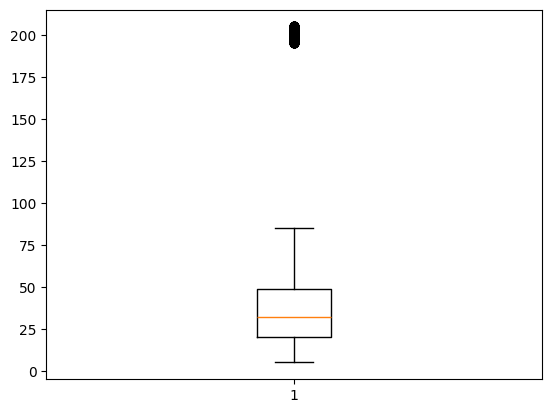

In [9]:
plt.boxplot(df['K'])   # k        outlier is there so i have to remove it

***removing of those outlier***

In [10]:
Q1=df['K'].quantile(0.25)
Q3=df['K'].quantile(0.75)
IQR=Q3-Q1

In [11]:
lower_bound=Q1 - 1.5*IQR
higher_bound=Q3 + 1.5*IQR

In [12]:
lower_bound,higher_bound

(np.float64(-23.5), np.float64(92.5))

In [13]:
df['K']=np.where(df['K']<lower_bound,lower_bound,np.where(df['K']>higher_bound,higher_bound,df['K']))

<Axes: ylabel='K'>

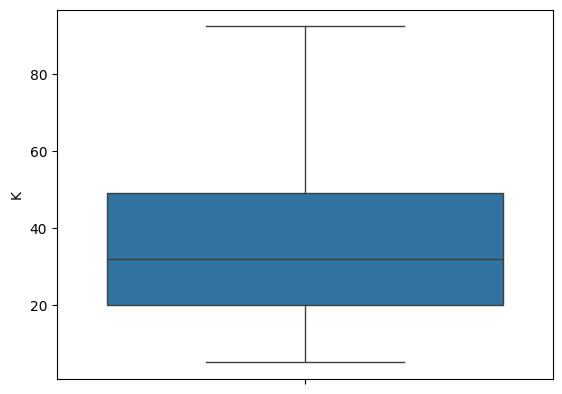

In [14]:
sns.boxplot(df['K'])

***splitting the data***

In [15]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
X,y

(        N   P     K  temperature   humidity        ph    rainfall
 0      90  42  43.0    20.879744  82.002744  6.502985  202.935536
 1      85  58  41.0    21.770462  80.319644  7.038096  226.655537
 2      60  55  44.0    23.004459  82.320763  7.840207  263.964248
 3      74  35  40.0    26.491096  80.158363  6.980401  242.864034
 4      78  42  42.0    20.130175  81.604873  7.628473  262.717340
 ...   ...  ..   ...          ...        ...       ...         ...
 2195  107  34  32.0    26.774637  66.413269  6.780064  177.774507
 2196   99  15  27.0    27.417112  56.636362  6.086922  127.924610
 2197  118  33  30.0    24.131797  67.225123  6.362608  173.322839
 2198  117  32  34.0    26.272418  52.127394  6.758793  127.175293
 2199  104  18  30.0    23.603016  60.396475  6.779833  140.937041
 
 [2200 rows x 7 columns],
 0         rice
 1         rice
 2         rice
 3         rice
 4         rice
          ...  
 2195    coffee
 2196    coffee
 2197    coffee
 2198    coffee
 2199   

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,stratify=y,random_state=42)

In [18]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [19]:
accuracy_score(y_pred,y_test)  # accuracy used when output is classification problem and r2 when it is numeric

0.990909090909091

In [20]:
new_input=[68,58,38,23.22397386,83.03322691,6.336253525,221.2091958]   # you can also do [[]] by removing next two steps
new_input_as_np_array=np.asarray(new_input)
new_input_as_np_array_reshape=new_input_as_np_array.reshape(1,-1)
model.predict(new_input_as_np_array_reshape)

c:\Users\hp\OneDrive\Desktop\mega projects\crop prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['rice'], dtype=object)

In [21]:
import pickle
pickle.dump(model,open("model.pkl","wb"))